**1.** 根据印度数学家斯里尼瓦瑟·拉马努金(Srinivasa Ramanujan)发现的公式，编写一个函数`estimatePi()`来估计并返回 $\pi$ 的值。 它应该使用`while`循环来计算求和项，直到最后一项小于 $10^{-15}$。 计算公式如下：
$$\frac{1}{\pi}=\frac{2\sqrt{2}}{9801}\sum_{k=0}^{\infty}\frac{(4k)!(1103+26390k)}{(k!)^4396^{4k}}$$
这里 $k!$ 是 $k$ 的阶乘。

*提示： 阶乘可以使用递归进行计算* 

In [1]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

**2.** Consider a radioactive decay problem involving two types of nuclei, $A$ and $B$,
with populations $N_{A}(t)$ and $N_{B}(t)$. Suppose that type $A$ nuclei decay to form
type $B$ nuclei, which then also decay, according to the differential equations

$$
\begin{aligned} \frac{d N_{A}}{d t} &=-\frac{N_{A}}{\tau_{A}} \\ \frac{d N_{B}}{d t} &=\frac{N_{A}}{\tau_{A}}-\frac{N_{B}}{\tau_{B}} \end{aligned}
$$

where $\tau_A$ and $\tau_B$ are the decay time constants for each type of nucleus. Use the Euler method to solve these coupled equations for $N_A$ and $N_B$ as functions of time. This problem can also be solved exactly, as was the case with our original nuclear decay problem (1.1). Obtain the analytic solutions for $N_A(t)$ and $N_B(t)$, and compare them with your numerical results. It is also interesting to explore the behavior found for different values of the ratio $\tau_A/\tau_B$. In particular, try to interpret the short and long time behaviors for different values of this ratio.

In [17]:
# Problem 1
import numpy as np

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    
def estimate_pi():
    k = 0
    countdown = 0
    item = 1.0
    while item > 1e-15 :
        item = factorial (4 * k) * (1103 + 26390 * k) / ( pow (factorial(k), 4) * pow (396, 4 * k) )
        k += 1
        countdown += item
    pi = 9801 / (np.sqrt(8) * countdown)
    return pi

pi = estimate_pi()
print(pi)

3.141592653589793


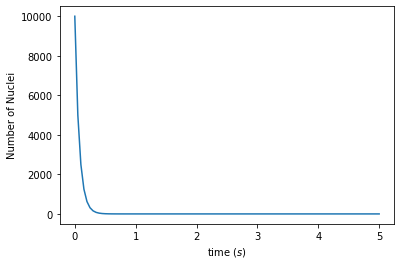

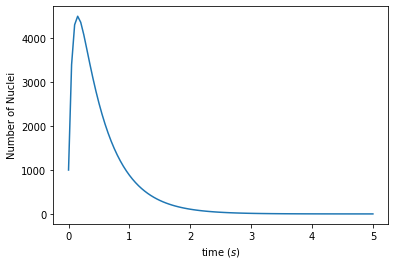

In [27]:
# Problem 2
import matplotlib.pyplot as plt
import numpy as np

class decay(object):
    def __init__(self, name, init_number, constant):
        self.number = [init_number]
        self.t = [0]
        self.tau = constant
        self.time = 5
        self.dt = 0.05
        self.n_step = 100
        
    def change(self):
        change = self.number[-1] / self.tau
        return change
    
    def show_results(self):
        plt.plot(self.t, self.number)
        plt.xlabel('time ($s$)')
        plt.ylabel('Number of Nuclei')
        plt.show()
        
def calculation(N, change, dt):
    tmp = N - change * dt
    return tmp

a = decay('a', 10000, 0.1)
b = decay('b', 1000, 0.5)

for i in range(a.n_step):
    a.number.append(calculation(a.number[i], a.change(), 0.05))
    a.t.append(a.t[i] + 0.05)
    b.number.append(calculation(b.number[i], b.change() - a.change(), 0.05))
    b.t.append(b.t[i] + 0.05)

a.show_results()
b.show_results()